In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# making get request of the URL
url = requests.get('http://covid.gov.pk/')

In [3]:
# Reading the excel for any previous data
raw_file = pd.read_excel('Spreadsheets/Corona Stats of Pakistan.xlsx')
raw_file

,CityNames,CityWiseCounts,Date,Headers,OverallCounts
0,ICT,102,2020-04-09,Recovered,572
1,Punjab,"2,171",2020-04-09,Critical,31
2,Sindh,"1,128",2020-04-09,Deaths,63
3,KP,560,2020-04-09,Cases (24 HRS),92
4,Balochistan,212,2020-04-09,Deaths (24 HRS),5
5,AJK,28,2020-04-09,Tests (24 HRS),"2,737"
6,GB,213,2020-04-09,Total Tests,"44,896"


In [4]:
# making copy of the raw file
df_file = raw_file.copy()
df_file

,CityNames,CityWiseCounts,Date,Headers,OverallCounts
0,ICT,102,2020-04-09,Recovered,572
1,Punjab,"2,171",2020-04-09,Critical,31
2,Sindh,"1,128",2020-04-09,Deaths,63
3,KP,560,2020-04-09,Cases (24 HRS),92
4,Balochistan,212,2020-04-09,Deaths (24 HRS),5
5,AJK,28,2020-04-09,Tests (24 HRS),"2,737"
6,GB,213,2020-04-09,Total Tests,"44,896"


In [5]:
# getting the content from the URL and then parsing it using the html parser
soup = BeautifulSoup(url.content, "html.parser")

In [6]:
# soup

In [7]:
# below for loop finds the h2 heading, which is ConfirmedCases and h1 heading, which is the Count
lst = []
for g in soup.findAll('div', class_ = 'col-12 col-md-6 wow fadeInUp'):
    header_name = g.find('h2')
    header_count = g.find('h1')
#     print (header_count)
    details_pak = {
        "Name" : header_name.text,
        "Count" : header_count.text 
    }
    lst.append(details_pak)
    
print (lst)

[{'Name': 'ConfirmedCases', 'Count': '4,601'}]


In [8]:
# Making the DF from the list created above by the for loop
df_total_count = pd.DataFrame(lst)
df_total_count

,Count,Name
0,"4,601",ConfirmedCases


In [9]:
# Function to pull the data from specific class
lst_column_details = []
lst_count_details = []
def get_details(a, b, c):
#     a = []
    for g in soup.findAll('div', class_ = 'col-12 col-md-6 text-center numbers-child wow fadeInUp'):
        details = {}
        for i in g.findAll(a):
            details[b] = i.text
            c.append(details[b])
    return (c)

In [10]:
# Calling the function to pull the headings
get_details('h6', 'Columns', lst_column_details)

['Recovered',
 'Critical',
 'Deaths',
 'Cases (24 HRS)',
 'Deaths (24 HRS)',
 'Tests (24 HRS)',
 'Total Tests']

In [11]:
# calling the function to get the counts
get_details('h4', 'Counts', lst_count_details)

['727', '45', '66', '284', '4', '2,478', '54,706']

In [12]:
# Function to pull City names and City wise case counts
lst_cities = []
lst_cases = []
def get_citywise_details():
    for g in soup.findAll('div', class_='row provinc-stat'):
        names = g.findAll('a')
        for n in names:
            city_names = n.text
            dict_city = {
                "City": city_names
            }
            print (city_names)
            print (dict_city)
            lst_cities.append(dict_city)
        counts = g.findAll('h4')
        for c in counts:
            case_counts = c.text
            dict_cases = {
                "Counts": case_counts
            }
            print (case_counts)
            lst_cases.append(dict_cases)

In [13]:
# calling the function
get_citywise_details()

ICT
{'City': 'ICT'}
Punjab
{'City': 'Punjab'}
Sindh
{'City': 'Sindh'}
KP
{'City': 'KP'}
Balochistan
{'City': 'Balochistan'}
AJK
{'City': 'AJK'}
GB
{'City': 'GB'}
107
2,279
1,128
620
219
33
215


In [14]:
print (lst_cities)
print (lst_cases)

[{'City': 'ICT'}, {'City': 'Punjab'}, {'City': 'Sindh'}, {'City': 'KP'}, {'City': 'Balochistan'}, {'City': 'AJK'}, {'City': 'GB'}]
[{'Counts': '107'}, {'Counts': '2,279'}, {'Counts': '1,128'}, {'Counts': '620'}, {'Counts': '219'}, {'Counts': '33'}, {'Counts': '215'}]


In [15]:
# Creating DF from the lists of city names and city wise counts
df_citynames = pd.DataFrame(lst_cities)
df_citywise_cases = pd.DataFrame(lst_cases)

In [16]:
df_citynames

,City
0,ICT
1,Punjab
2,Sindh
3,KP
4,Balochistan
5,AJK
6,GB


In [17]:
df_citywise_cases

,Counts
0,107
1,"2,279"
2,"1,128"
3,620
4,219
5,33
6,215


In [18]:
# Creating DF from the list of h6 headings
df_col = pd.DataFrame(lst_column_details, columns=['ColumnNames'])
df_col

,ColumnNames
0,Recovered
1,Critical
2,Deaths
3,Cases (24 HRS)
4,Deaths (24 HRS)
5,Tests (24 HRS)
6,Total Tests


In [19]:
# Creating DF from the list of Counts for the h6 headings
df_counts = pd.DataFrame(lst_count_details, columns=['Counts'])
df_counts

,Counts
0,727
1,45
2,66
3,284
4,4
5,"2,478"
6,"54,706"


In [20]:
# Pulling today's time and formating it according to the requirement
today = dt.now().strftime("%Y-%m-%d")
# today

In [21]:
df_citynames

,City
0,ICT
1,Punjab
2,Sindh
3,KP
4,Balochistan
5,AJK
6,GB


In [22]:
# Creating an empty Dataframe
df_final = pd.DataFrame()

In [23]:
# Filling the above empty frame with the Data
df_final['CityNames'] = df_citynames.City
df_final['Date'] = today
df_final['CityWiseCounts'] = df_citywise_cases.Counts
df_final['Headers'] = df_col['ColumnNames']
df_final['OverallCounts'] = df_counts['Counts']

In [24]:
df_final

,CityNames,Date,CityWiseCounts,Headers,OverallCounts
0,ICT,2020-04-10,107,Recovered,727
1,Punjab,2020-04-10,"2,279",Critical,45
2,Sindh,2020-04-10,"1,128",Deaths,66
3,KP,2020-04-10,620,Cases (24 HRS),284
4,Balochistan,2020-04-10,219,Deaths (24 HRS),4
5,AJK,2020-04-10,33,Tests (24 HRS),"2,478"
6,GB,2020-04-10,215,Total Tests,"54,706"


In [25]:
# Appending the raw file's data frame with the newly created dataframe and also resetting the index
df_file = df_file.append(df_final).reset_index()
df_file

/Users/Muhammad/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,index,CityNames,CityWiseCounts,Date,Headers,OverallCounts
0,0,ICT,102,2020-04-09,Recovered,572
1,1,Punjab,"2,171",2020-04-09,Critical,31
2,2,Sindh,"1,128",2020-04-09,Deaths,63
3,3,KP,560,2020-04-09,Cases (24 HRS),92
4,4,Balochistan,212,2020-04-09,Deaths (24 HRS),5
5,5,AJK,28,2020-04-09,Tests (24 HRS),"2,737"
6,6,GB,213,2020-04-09,Total Tests,"44,896"
7,0,ICT,107,2020-04-10,Recovered,727
8,1,Punjab,"2,279",2020-04-10,Critical,45
9,2,Sindh,"1,128",2020-04-10,Deaths,66


In [26]:
df_file.Date = df_file.Date.astype(str)
# df_final.Date

In [27]:
df_file.Date = df_file.Date.str.replace(' 00:00:00', '')
# df_final.Date

In [28]:
df_file.drop(columns=['index'], inplace=True)

In [29]:
df_file.head(14)

,CityNames,CityWiseCounts,Date,Headers,OverallCounts
0,ICT,102,2020-04-09,Recovered,572
1,Punjab,"2,171",2020-04-09,Critical,31
2,Sindh,"1,128",2020-04-09,Deaths,63
3,KP,560,2020-04-09,Cases (24 HRS),92
4,Balochistan,212,2020-04-09,Deaths (24 HRS),5
5,AJK,28,2020-04-09,Tests (24 HRS),"2,737"
6,GB,213,2020-04-09,Total Tests,"44,896"
7,ICT,107,2020-04-10,Recovered,727
8,Punjab,"2,279",2020-04-10,Critical,45
9,Sindh,"1,128",2020-04-10,Deaths,66


In [30]:
# getting city wise date and counts and assigning to variables
ict = df_file.loc[df_file['CityNames'] == 'ICT', ['CityWiseCounts', 'Date']]
punjab = df_file.loc[df_file['CityNames'] == 'Punjab', ['CityWiseCounts', 'Date']]
sindh = df_file.loc[df_file['CityNames'] == 'Sindh', ['CityWiseCounts', 'Date']]
kp = df_file.loc[df_file['CityNames'] == 'KP', ['CityWiseCounts', 'Date']]
balochistan = df_file.loc[df_file['CityNames'] == 'Balochistan', ['CityWiseCounts', 'Date']]
ajk = df_file.loc[df_file['CityNames'] == 'AJK', ['CityWiseCounts', 'Date']]
gb = df_file.loc[df_file['CityNames'] == 'GB', ['CityWiseCounts', 'Date']]

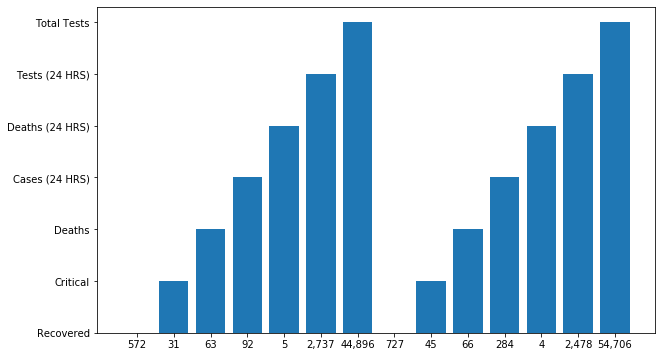

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))
plt.bar(df_file.OverallCounts,df_file.Headers)
plt.show()

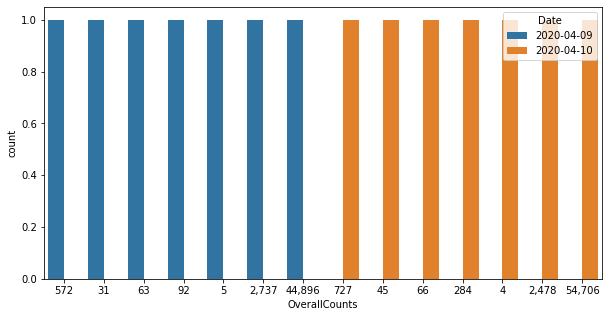

In [32]:
plt.figure(figsize=(10, 5))
sns.countplot(x="OverallCounts", data=df_file, hue='Date')

<function matplotlib.pyplot.show(*args, **kw)>

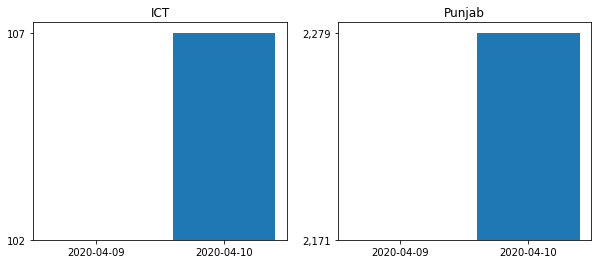

In [33]:
plt.figure(figsize = (10, 4))

plt.subplot (1,2,1)

plt.bar(ict.Date, ict.CityWiseCounts)
plt.title('ICT')

plt.subplot (1,2,2)
plt.bar(punjab.Date, punjab.CityWiseCounts)
plt.title('Punjab')

plt.show

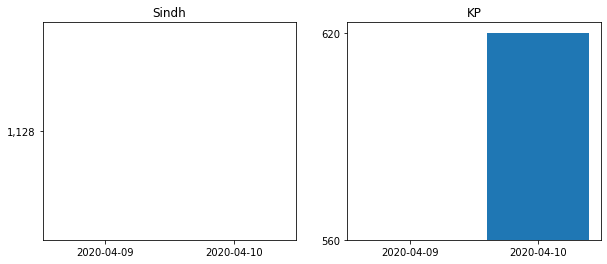

In [34]:
plt.figure(figsize = (10, 4))
plt.subplot (1,2,1)
plt.bar(sindh.Date, sindh.CityWiseCounts)
plt.title('Sindh')

plt.subplot(1,2,2)
plt.bar(kp.Date, kp.CityWiseCounts)
plt.title('KP')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

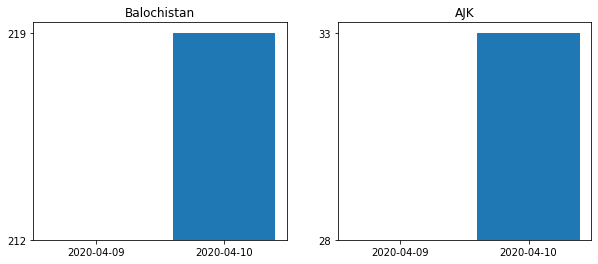

In [35]:
plt.figure(figsize = (10, 4))

plt.subplot (1,2,1)

plt.bar(balochistan.Date, balochistan.CityWiseCounts)
plt.title('Balochistan')

plt.subplot (1,2,2)
plt.bar(ajk.Date, ajk.CityWiseCounts)
plt.title('AJK')

plt.show

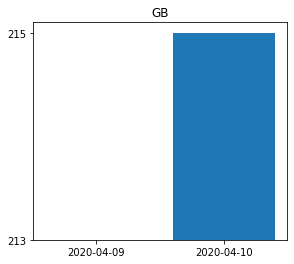

In [36]:
plt.figure(figsize = (10, 4))

plt.subplot (1,2,1)

plt.bar(gb.Date, gb.CityWiseCounts)
plt.title('GB')

plt.show()

In [37]:
df_file.to_excel('Spreadsheets/Corona Stats of Pakistan.xlsx', index=False)